## Regression Plots with the Prestige Dataset

In [1]:
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data
prestige.head()

,type,income,education,prestige
rownames,,,,
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [3]:
model = ols("prestige~income+education", data=prestige).fit()

In [4]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           8.65e-17
Time:                        19:17:16   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.163     -14.686       2.556
income         0.5987      0.120      5.003      0.000       0.357       0.840
education      0.5458      0.098      5.555      0.000       0.348       0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Influence Plots

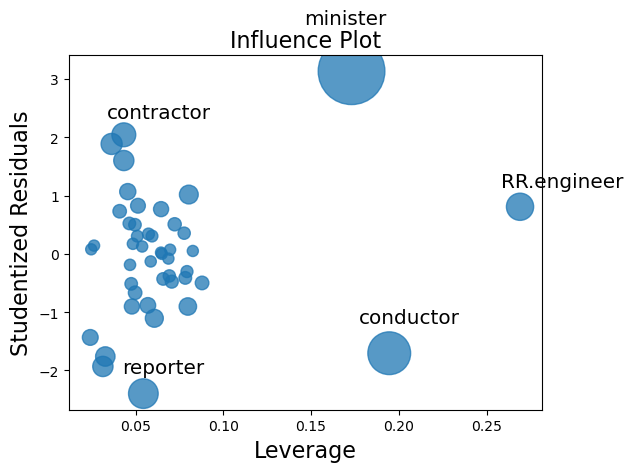

In [5]:
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1);

### Partial Regression Plot

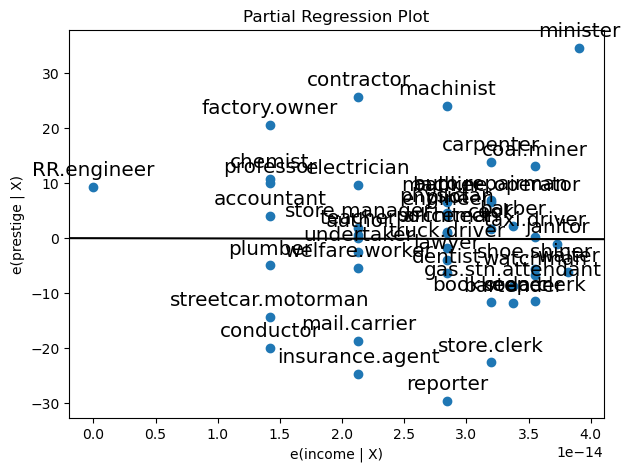

In [6]:
fig = sm.graphics.plot_partregress("prestige", "income", ["income", "education"], data=prestige)
fig.tight_layout(pad=1.0)

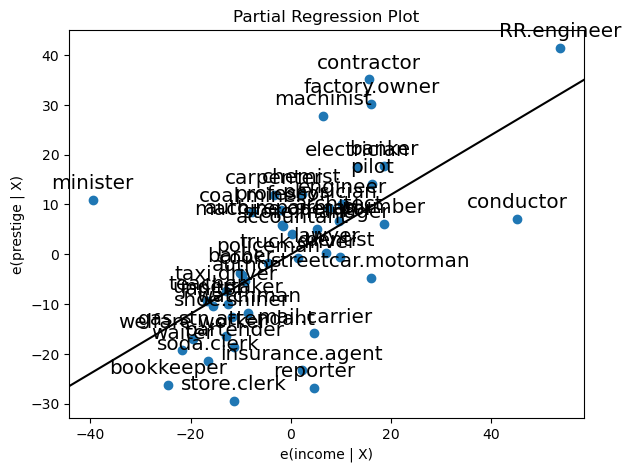

In [7]:
fig = sm.graphics.plot_partregress("prestige", "income", ["education"], data=prestige)
fig.tight_layout(pad=1.0)

In [8]:
subset = ~prestige.index.isin(["conductor", "RR.engineer", "minister"])
model2 = ols("prestige~income+education", data=prestige, subset=subset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           2.02e-18
Time:                        19:25:12   Log-Likelihood:                -160.59
No. Observations:                  42   AIC:                             327.2
Df Residuals:                      39   BIC:                             332.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3174      3.680     -1.717      0.094     -13.760       1.125
income         0.9307      0.154      6.053      0.000       0.620       1.242
education      0.2846      0.121      2.345      0.024       0.039       0.530
==============================================================================
Omnibus:                        3.811   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                2.802
Skew:                          -0.614   Prob(JB):                        0.246
Kurtosis:                       3.303   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

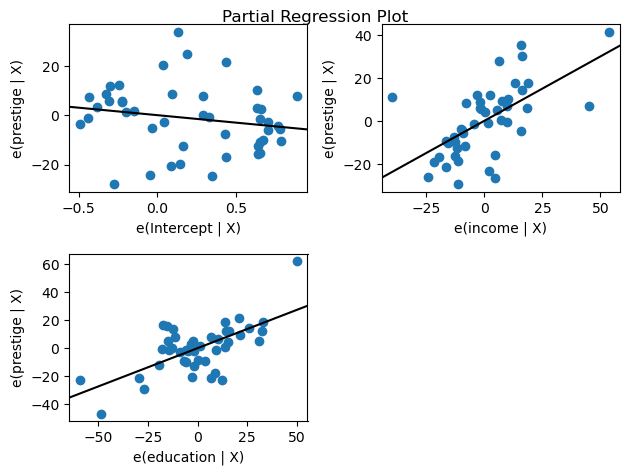

In [12]:
fig = sm.graphics.plot_partregress_grid(model)

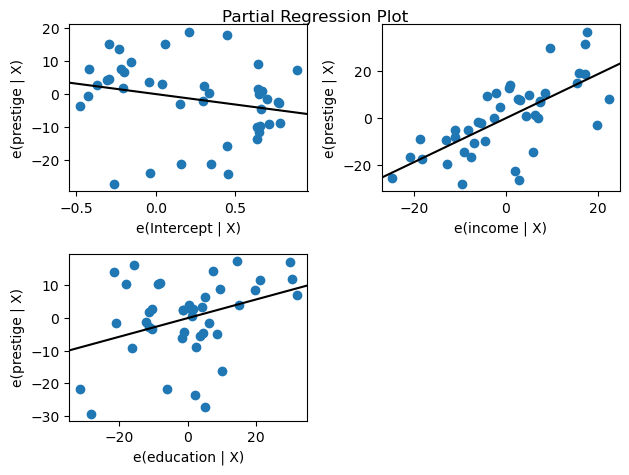

In [11]:
fig = sm.graphics.plot_partregress_grid(model2)